# PDAP2019.2: Lecture 05 (12 Nov 2019)
## Data selection in *pandas*

### Selecting data using boolean indexes

In [1]:
import pandas as pd

In [2]:
complaints = pd.read_csv(
    '/data/pdap/311-service-requests.csv')
complaints.head(2)

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unique Key            Created Date Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM         NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM         NaN   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type Incident Zip  \
0                  Loud Talking  Street/Sidewalk        11432   
1  Commercial Overnight Parking  Street/Sidewalk        11378   

   Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0  90-03 169 STREET  ...                 NaN                      NaN   
1         58 AVENUE  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.708275 -73.791604   
1                 NaN  40.721041 -73.909453   

                                   Location  
0   (40.70827532593202, -73.79160395779721)  
1  (40.721040535628305, -73.90945306791765)  

[2 rows x 52 columns]

In [3]:
complaints.shape

(111069, 52)

In [4]:
is_noise = (complaints['Complaint Type'] == 'Noise - Street/Sidewalk')

In [5]:
is_noise.head()

0     True
1    False
2    False
3    False
4    False
Name: Complaint Type, dtype: bool

In [6]:
noise_complaints = complaints[is_noise]

In [7]:
noise_complaints.head(2)

Unique Key            Created Date             Closed Date Agency  \
0     26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
16    26594086  10/31/2013 12:54:03 AM  10/31/2013 02:16:39 AM   NYPD   

                        Agency Name           Complaint Type  \
0   New York City Police Department  Noise - Street/Sidewalk   
16  New York City Police Department  Noise - Street/Sidewalk   

          Descriptor    Location Type Incident Zip     Incident Address  ...  \
0       Loud Talking  Street/Sidewalk        11432     90-03 169 STREET  ...   
16  Loud Music/Party  Street/Sidewalk        10310  173 CAMPBELL AVENUE  ...   

   Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                  NaN                      NaN       NaN   
16                 NaN                      NaN       NaN   

   Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                     NaN             NaN             NaN                 NaN   
16                    NaN             NaN             NaN                 NaN   

     Latitude  Longitude                                 Location  
0   40.708275 -73.791604  (40.70827532593202, -73.79160395779721)  
16  40.636182 -74.116150   (40.63618202176914, -74.1161500428337)  

[2 rows x 52 columns]

In [8]:
(noise_complaints['Complaint Type'] == 'Noise - Street/Sidewalk').all()

True

In [9]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [10]:
complaints['Borough'].unique()

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [11]:
pd.unique(complaints['Borough'])

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [12]:
in_brooklyn = (complaints['Borough'] == 'BROOKLYN')

In [13]:
complaints[is_noise & in_brooklyn].head()  # and

Unique Key            Created Date             Closed Date Agency  \
31     26595564  10/31/2013 12:30:36 AM                     NaN   NYPD   
49     26595553  10/31/2013 12:05:10 AM  10/31/2013 02:43:43 AM   NYPD   
109    26594653  10/30/2013 11:26:32 PM  10/31/2013 12:18:54 AM   NYPD   
236    26591992  10/30/2013 10:02:58 PM  10/30/2013 10:23:20 PM   NYPD   
370    26594167  10/30/2013 08:38:25 PM  10/30/2013 10:26:28 PM   NYPD   

                         Agency Name           Complaint Type  \
31   New York City Police Department  Noise - Street/Sidewalk   
49   New York City Police Department  Noise - Street/Sidewalk   
109  New York City Police Department  Noise - Street/Sidewalk   
236  New York City Police Department  Noise - Street/Sidewalk   
370  New York City Police Department  Noise - Street/Sidewalk   

           Descriptor    Location Type Incident Zip    Incident Address  ...  \
31   Loud Music/Party  Street/Sidewalk        11236            AVENUE J  ...   
49       Loud Talking  Street/Sidewalk        11225  25 LEFFERTS AVENUE  ...   
109  Loud Music/Party  Street/Sidewalk        11222                 NaN  ...   
236      Loud Talking  Street/Sidewalk        11218       DITMAS AVENUE  ...   
370  Loud Music/Party  Street/Sidewalk        11218    126 BEVERLY ROAD  ...   

    Bridge Highway Name Bridge Highway Direction Road Ramp  \
31                  NaN                      NaN       NaN   
49                  NaN                      NaN       NaN   
109                 NaN                      NaN       NaN   
236                 NaN                      NaN       NaN   
370                 NaN                      NaN       NaN   

    Bridge Highway Segment Garage Lot Name Ferry Direction  \
31                     NaN             NaN             NaN   
49                     NaN             NaN             NaN   
109                    NaN             NaN             NaN   
236                    NaN             NaN             NaN   
370                    NaN             NaN             NaN   

    Ferry Terminal Name   Latitude  Longitude  \
31                  NaN  40.634104 -73.911055   
49                  NaN  40.661793 -73.959934   
109                 NaN  40.724600 -73.954271   
236                 NaN  40.636169 -73.972455   
370                 NaN  40.642922 -73.978762   

                                     Location  
31   (40.634103775951736, -73.91105541883589)  
49     (40.6617931276793, -73.95993363978067)  
109  (40.724599563793525, -73.95427134534344)  
236   (40.63616876563881, -73.97245504682485)  
370    (40.6429222774404, -73.97876175474585)  

[5 rows x 52 columns]

In [14]:
complaints[is_noise | in_brooklyn].head(2)  # or (non-exclusive)

Unique Key            Created Date             Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
9    26594392  10/31/2013 01:34:41 AM  10/31/2013 02:23:51 AM   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk      Loud Talking   
9  New York City Police Department       Noise - Commercial  Loud Music/Party   

         Location Type Incident Zip     Incident Address  ...  \
0      Street/Sidewalk        11432     90-03 169 STREET  ...   
9  Club/Bar/Restaurant        11225  835 NOSTRAND AVENUE  ...   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
9                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
9                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                 Location  
0  40.708275 -73.791604  (40.70827532593202, -73.79160395779721)  
9  40.668204 -73.950648  (40.66820406598287, -73.95064760056546)  

[2 rows x 52 columns]

In [15]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
noise_complaint_counts

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [16]:
complaint_counts = complaints['Borough'].value_counts()
complaint_counts

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

In [17]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

In [18]:
test = noise_complaint_counts.copy()
test['extravalue'] = 123
test

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
extravalue       123
Name: Borough, dtype: int64

In [19]:
test / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
extravalue            NaN
Name: Borough, dtype: float64

In [20]:
(test / complaint_counts).fillna(22)

BRONX             0.014833
BROOKLYN          0.013864
MANHATTAN         0.037755
QUEENS            0.010143
STATEN ISLAND     0.007474
Unspecified       0.000141
extravalue       22.000000
Name: Borough, dtype: float64

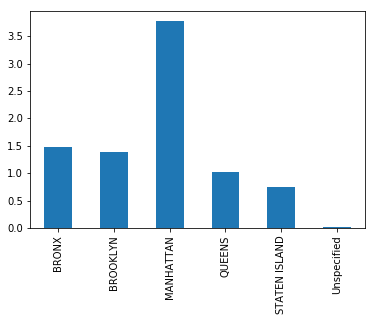

In [21]:
%matplotlib inline
(100. * noise_complaint_counts / complaint_counts).plot.bar();

### Encoding of text / ASCII files

In [22]:
pd.read_csv('/data/pdap/bikes.csv',
            delimiter=';',
            parse_dates=['Date'],
            dayfirst=True,
            index_col='Date')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 2: invalid continuation byte

In [23]:
df = pd.read_csv('/data/pdap/bikes.csv',
                 delimiter=';',
                 parse_dates=['Date'],
                 dayfirst=True,
                 index_col='Date',
                 encoding='latin1')  # or try 'cp1252'

df.head()

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   
2012-01-04      144                                NaN                      1   
2012-01-05      197                                NaN                      2   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01             38             51       26            10       16   
2012-01-02             68            153       53             6       43   
2012-01-03            104            248       89             3       58   
2012-01-04            116            318      111             8       61   
2012-01-05            124            330       97            13       95   

            St-Urbain (données non disponibles)  
Date                                             
2012-01-01                                  NaN  
2012-01-02                                  NaN  
2012-01-03                                  NaN  
2012-01-04                                  NaN  
2012-01-05                                  NaN

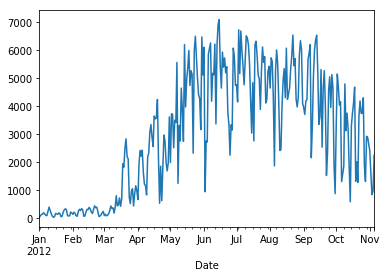

In [24]:
df['Berri 1'].plot();

### Datetime columns / indexes in *pandas*

In [25]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [26]:
df.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [27]:
df.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Date', length=310)

In [28]:
df.loc[:, 'Weekday'] = df.index.weekday_name
df.insert(0, 'Weekday_number', df.index.weekday)  # not everything leaves the  data unchanged!!!

In [29]:
df.head()

Weekday_number  Berri 1  Brébeuf (données non disponibles)  \
Date                                                                     
2012-01-01               6       35                                NaN   
2012-01-02               0       83                                NaN   
2012-01-03               1      135                                NaN   
2012-01-04               2      144                                NaN   
2012-01-05               3      197                                NaN   

            Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  \
Date                                                                       
2012-01-01                      0             38             51       26   
2012-01-02                      1             68            153       53   
2012-01-03                      2            104            248       89   
2012-01-04                      1            116            318      111   
2012-01-05                      2            124            330       97   

            Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)  \
Date                                                                     
2012-01-01            10       16                                  NaN   
2012-01-02             6       43                                  NaN   
2012-01-03             3       58                                  NaN   
2012-01-04             8       61                                  NaN   
2012-01-05            13       95                                  NaN   

              Weekday  
Date                   
2012-01-01     Sunday  
2012-01-02     Monday  
2012-01-03    Tuesday  
2012-01-04  Wednesday  
2012-01-05   Thursday

### Data aggregation

In [30]:
import numpy as np

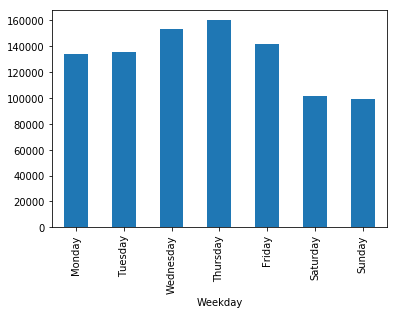

In [31]:
meandf = df.groupby('Weekday').aggregate(np.sum)
meandf = meandf.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
           'Saturday', 'Sunday']]
meandf['Berri 1'].plot.bar();

In [32]:
import matplotlib.pyplot as plt

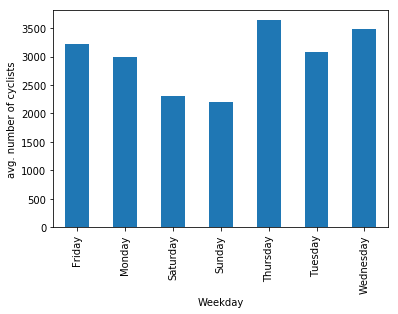

In [33]:
df.groupby('Weekday').aggregate(np.mean)['Berri 1'].plot.bar()
plt.ylabel('avg. number of cyclists');

In [34]:
df.resample('1M').mean()

Weekday_number      Berri 1  Brébeuf (données non disponibles)  \
Date                                                                         
2012-01-31        2.935484   158.548387                                NaN   
2012-02-29        2.965517   231.448276                                NaN   
2012-03-31        3.096774   846.096774                                NaN   
2012-04-30        3.000000  2256.633333                                NaN   
2012-05-31        2.903226  4299.161290                                NaN   
2012-06-30        3.100000  4828.300000                                NaN   
2012-07-31        2.935484  5243.935484                                NaN   
2012-08-31        3.000000  4813.774194                                NaN   
2012-09-30        3.166667  4235.366667                                NaN   
2012-10-31        2.806452  3057.838710                                NaN   
2012-11-30        3.600000  1608.800000                                NaN   

            Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2      du Parc  \
Date                                                                           
2012-01-31               1.225806     106.709677     249.580645    99.612903   
2012-02-29               1.758621     157.689655     352.620690   167.310345   
2012-03-31             367.354839     586.903226    1152.774194   693.129032   
2012-04-30             971.233333    1643.733333    2859.533333  1534.933333   
2012-05-31            1753.548387    3039.483871    4987.387097  2527.580645   
2012-06-30            1960.866667    3173.766667    5640.900000  2873.000000   
2012-07-31            1924.419355    3289.322581    5892.677419  2839.032258   
2012-08-31            1986.741935    3068.064516    5437.290323  2718.096774   
2012-09-30            1932.866667    2784.666667    4909.233333  2887.033333   
2012-10-31            1463.419355    2050.032258    3721.290323  2309.903226   
2012-11-30             788.200000    1167.400000    2198.800000  1403.200000   

            Pierre-Dupuy      Rachel1  St-Urbain (données non disponibles)  
Date                                                                        
2012-01-31      5.161290    36.774194                                  NaN  
2012-02-29      8.275862     2.517241                                  NaN  
2012-03-31    214.000000   852.806452                                  NaN  
2012-04-30    539.833333  2391.966667                                  NaN  
2012-05-31   1617.096774  4180.322581                                  NaN  
2012-06-30   1768.100000  4884.333333                                  NaN  
2012-07-31   2581.709677  4861.387097                                  NaN  
2012-08-31   1857.516129  4431.516129                                  NaN  
2012-09-30   1410.933333  4125.233333                                  NaN  
2012-10-31    636.967742  3030.935484                                  NaN  
2012-11-30    148.600000  1891.000000                                  NaN

### String formatting

In [35]:
'we can ' + '234' + ' bka'

'we can 234 bka'

In [36]:
mystring = '{name} is {age} years old'
mystring.format(name='Susan', age=12)

'Susan is 12 years old'

In [37]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year={year}&Month={month}&format=csv&timeframe=1&submit=%20Download+Data"
url_template.format(year=2012, month=3)

'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?stationID=5415&Year=2012&Month=3&format=csv&timeframe=1&submit=%20Download+Data'

In [38]:
weather_mar12 = pd.read_csv(url_template.format(year=2012, month=3),
                            index_col='Date/Time', parse_dates=True)
weather_mar12.head()

Longitude (x)  Latitude (y)  \
Date/Time                                          
2012-03-01 00:00:00         -73.75         45.47   
2012-03-01 01:00:00         -73.75         45.47   
2012-03-01 02:00:00         -73.75         45.47   
2012-03-01 03:00:00         -73.75         45.47   
2012-03-01 04:00:00         -73.75         45.47   

                                               Station Name  Climate ID  Year  \
Date/Time                                                                       
2012-03-01 00:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 01:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 02:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 03:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 04:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   

                     Month  Day   Time  Temp (°C)  Temp Flag  ...  \
Date/Time                                                     ...   
2012-03-01 00:00:00      3    1  00:00       -5.5        NaN  ...   
2012-03-01 01:00:00      3    1  01:00       -5.7        NaN  ...   
2012-03-01 02:00:00      3    1  02:00       -5.4        NaN  ...   
2012-03-01 03:00:00      3    1  03:00       -4.7        NaN  ...   
2012-03-01 04:00:00      3    1  04:00       -5.4        NaN  ...   

                     Wind Spd Flag  Visibility (km)  Visibility Flag  \
Date/Time                                                              
2012-03-01 00:00:00            NaN              4.0              NaN   
2012-03-01 01:00:00            NaN              2.4              NaN   
2012-03-01 02:00:00            NaN              4.8              NaN   
2012-03-01 03:00:00            NaN              4.0              NaN   
2012-03-01 04:00:00            NaN              1.6              NaN   

                     Stn Press (kPa)  Stn Press Flag  Hmdx  Hmdx Flag  \
Date/Time                                                               
2012-03-01 00:00:00           100.97             NaN   NaN        NaN   
2012-03-01 01:00:00           100.87             NaN   NaN        NaN   
2012-03-01 02:00:00           100.80             NaN   NaN        NaN   
2012-03-01 03:00:00           100.69             NaN   NaN        NaN   
2012-03-01 04:00:00           100.62             NaN   NaN        NaN   

                    Wind Chill  Wind Chill Flag  Weather  
Date/Time                                                 
2012-03-01 00:00:00      -13.0              NaN     Snow  
2012-03-01 01:00:00      -13.0              NaN     Snow  
2012-03-01 02:00:00      -13.0              NaN     Snow  
2012-03-01 03:00:00      -12.0              NaN     Snow  
2012-03-01 04:00:00      -14.0              NaN     Snow  

[5 rows x 27 columns]

### String columns in *pandas*

In [39]:
weather_mar12['Weather'].unique()

array(['Snow', 'Cloudy', 'Freezing Drizzle,Snow', 'Fog',
       'Snow,Ice Pellets', 'Mainly Clear', 'Mostly Cloudy',
       'Rain Showers', 'Snow Showers', 'Clear', 'Rain', 'Rain,Fog',
       'Rain,Haze', 'Drizzle,Fog', 'Haze', 'Snow,Fog', 'Freezing Fog',
       'Drizzle'], dtype=object)

In [40]:
is_snow = weather_mar12['Weather'].str.contains('Snow')
weather_mar12[is_snow]

Longitude (x)  Latitude (y)  \
Date/Time                                          
2012-03-01 00:00:00         -73.75         45.47   
2012-03-01 01:00:00         -73.75         45.47   
2012-03-01 02:00:00         -73.75         45.47   
2012-03-01 03:00:00         -73.75         45.47   
2012-03-01 04:00:00         -73.75         45.47   
2012-03-01 05:00:00         -73.75         45.47   
2012-03-01 06:00:00         -73.75         45.47   
2012-03-01 07:00:00         -73.75         45.47   
2012-03-01 08:00:00         -73.75         45.47   
2012-03-01 09:00:00         -73.75         45.47   
2012-03-01 10:00:00         -73.75         45.47   
2012-03-01 11:00:00         -73.75         45.47   
2012-03-01 12:00:00         -73.75         45.47   
2012-03-01 13:00:00         -73.75         45.47   
2012-03-01 14:00:00         -73.75         45.47   
2012-03-01 15:00:00         -73.75         45.47   
2012-03-01 16:00:00         -73.75         45.47   
2012-03-01 17:00:00         -73.75         45.47   
2012-03-01 18:00:00         -73.75         45.47   
2012-03-01 19:00:00         -73.75         45.47   
2012-03-01 20:00:00         -73.75         45.47   
2012-03-01 21:00:00         -73.75         45.47   
2012-03-01 22:00:00         -73.75         45.47   
2012-03-01 23:00:00         -73.75         45.47   
2012-03-02 00:00:00         -73.75         45.47   
2012-03-02 01:00:00         -73.75         45.47   
2012-03-02 02:00:00         -73.75         45.47   
2012-03-02 03:00:00         -73.75         45.47   
2012-03-02 04:00:00         -73.75         45.47   
2012-03-02 05:00:00         -73.75         45.47   
...                            ...           ...   
2012-03-02 12:00:00         -73.75         45.47   
2012-03-02 13:00:00         -73.75         45.47   
2012-03-03 01:00:00         -73.75         45.47   
2012-03-03 02:00:00         -73.75         45.47   
2012-03-03 03:00:00         -73.75         45.47   
2012-03-03 04:00:00         -73.75         45.47   
2012-03-03 21:00:00         -73.75         45.47   
2012-03-03 22:00:00         -73.75         45.47   
2012-03-03 23:00:00         -73.75         45.47   
2012-03-04 21:00:00         -73.75         45.47   
2012-03-08 23:00:00         -73.75         45.47   
2012-03-09 00:00:00         -73.75         45.47   
2012-03-10 22:00:00         -73.75         45.47   
2012-03-14 10:00:00         -73.75         45.47   
2012-03-14 11:00:00         -73.75         45.47   
2012-03-14 12:00:00         -73.75         45.47   
2012-03-14 19:00:00         -73.75         45.47   
2012-03-28 00:00:00         -73.75         45.47   
2012-03-28 01:00:00         -73.75         45.47   
2012-03-28 02:00:00         -73.75         45.47   
2012-03-28 03:00:00         -73.75         45.47   
2012-03-28 04:00:00         -73.75         45.47   
2012-03-28 06:00:00         -73.75         45.47   
2012-03-28 07:00:00         -73.75         45.47   
2012-03-28 08:00:00         -73.75         45.47   
2012-03-29 05:00:00         -73.75         45.47   
2012-03-29 06:00:00         -73.75         45.47   
2012-03-29 07:00:00         -73.75         45.47   
2012-03-29 08:00:00         -73.75         45.47   
2012-03-29 09:00:00         -73.75         45.47   

                                               Station Name  Climate ID  Year  \
Date/Time                                                                       
2012-03-01 00:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 01:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 02:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 03:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 04:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 05:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 06:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-03-01 07:0